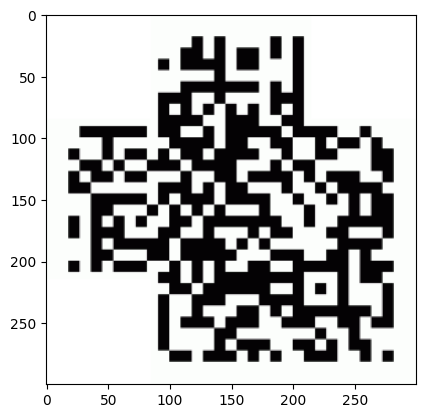

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

file_name = "qr-code.png"

img = cv2.imread(file_name)
plt.imshow(img)

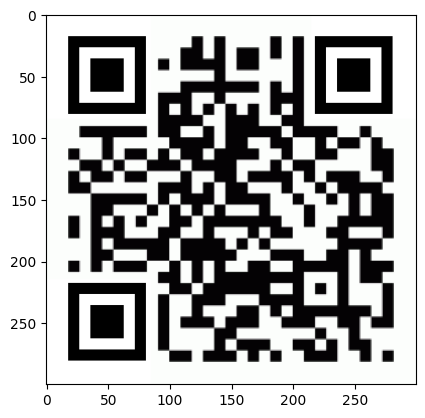

In [ ]:
def fill_corners(img):
    corners=[(18,18), (18,218), (218,18)]

    for corner in corners:
        img[corner[0]:corner[0]+9*7, corner[1]:corner[1]+9*7] = [0, 0, 0]
        img[corner[0]+9:corner[0]+9*6, corner[1]+9:corner[1]+9*6] = [255, 255, 255]
        img[corner[0]+9*2:corner[0]+9*5, corner[1]+9*2:corner[1]+9*5] = [0, 0, 0]

fill_corners(img)
plt.imshow(img)

In [19]:
detector = cv2.QRCodeDetector()
data, vertices_array, binary_qrcode = detector.detectAndDecode(img)

if vertices_array is not None:
    print("QRCode data:")
    print(data)
else:
    print("There was some error") 


QRCode data:
The key is /qrcod_35cGX5


QRCode data:
The key is /qrcod_PJsl43
/qrcod_PJsl43
<html><head></head><body><link rel='stylesheet' property='stylesheet' id='s' type='text/css' href='/template/s.css' media='all' /><iframe id='iframe' src='https://www.root-me.org/?page=externe_header'></iframe><p><p>Congratz, le flag est POHeyZ6pMvgn
</p></p><br/></body></html>


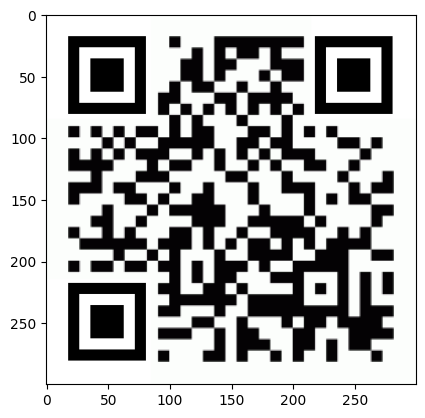

In [ ]:
import requests
from bs4 import BeautifulSoup
import base64

url = "http://challenge01.root-me.org/programmation/ch7/"

s = requests.session()
r = s.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

## Extract the image from the HTML
img_tag = soup.find('img')
img_data = img_tag['src'].split(',')[1]
# Decode the base64 image data
img_bytes = base64.b64decode(img_data)
# Convert the bytes to a numpy array
nparr = np.frombuffer(img_bytes, np.uint8)
# Decode the numpy array to an image
extracted_img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

fill_corners(extracted_img)
plt.imshow(extracted_img)

data, vertices_array, binary_qrcode = detector.detectAndDecode(extracted_img)

if vertices_array is not None:
    print("QRCode data:")
    print(data)
else:
    print("There was some error")

key = data.split("is ")[1]
print(key)

# Prepare the payload with the key
payload = {'metu': key}

# Send the POST request
response = s.post(url, data=payload)

# Print the response text
print(response.text)
